In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

#Import CitiPY
from citipy import citipy

In [2]:
# Import the requests library
import requests

# Import the API key.
from config import weather_api_key
temp_units = "imperial"

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=50859762553c8e3be1ca8fd0ba6e1e28


In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [4]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | la rioja
Processing Record 2 of Set 1 | hanzhong
Processing Record 3 of Set 1 | wulanhaote
City not found. Skipping...
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | port hardy
Processing Record 6 of Set 1 | bengkulu
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | san quintin
Processing Record 10 of Set 1 | vestmannaeyjar
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | hasaki
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | cape town
Processing Record 15 of Set 1 | pisco
Processing Record 16 of Set 1 | keshan
City not found. Skipping...
Processing Record 17 of Set 1 | mayumba
Processing Record 18 of Set 1 | klaksvik
Processing Record 19 of Set 1 | ranong
Processing Record 20 of Set 1 | pevek
Processing Record 21 of Set 1 | cherskiy
Processin

Processing Record 36 of Set 4 | avera
Processing Record 37 of Set 4 | slave lake
Processing Record 38 of Set 4 | tabiauea
City not found. Skipping...
Processing Record 39 of Set 4 | shimoda
Processing Record 40 of Set 4 | nouakchott
Processing Record 41 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 42 of Set 4 | hami
Processing Record 43 of Set 4 | saskylakh
Processing Record 44 of Set 4 | ozgon
City not found. Skipping...
Processing Record 45 of Set 4 | copperas cove
Processing Record 46 of Set 4 | port-gentil
Processing Record 47 of Set 4 | sao jose da coroa grande
Processing Record 48 of Set 4 | camacha
Processing Record 49 of Set 4 | rio grande
Processing Record 50 of Set 4 | bilma
Processing Record 1 of Set 5 | dali
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | trujillo
Processing Record 4 of Set 5 | sabha
Processing Record 5 of Set 5 | hambantota
Processing Record 6 of Set 5 | lorengau
Processing Record 7 of Set 5 | tegu

Processing Record 24 of Set 8 | rungata
City not found. Skipping...
Processing Record 25 of Set 8 | olden
Processing Record 26 of Set 8 | ambilobe
Processing Record 27 of Set 8 | marsabit
Processing Record 28 of Set 8 | voh
Processing Record 29 of Set 8 | mustasaari
Processing Record 30 of Set 8 | ajaccio
Processing Record 31 of Set 8 | newcastle
Processing Record 32 of Set 8 | mabaruma
Processing Record 33 of Set 8 | mundra
Processing Record 34 of Set 8 | ayagoz
Processing Record 35 of Set 8 | quatre cocos
Processing Record 36 of Set 8 | collie
Processing Record 37 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 38 of Set 8 | seoul
Processing Record 39 of Set 8 | minudasht
Processing Record 40 of Set 8 | saint-pierre
Processing Record 41 of Set 8 | palabuhanratu
City not found. Skipping...
Processing Record 42 of Set 8 | angoram
Processing Record 43 of Set 8 | kitimat
Processing Record 44 of Set 8 | srednekolymsk
Processing Record 45 of Set 8 | vaitupu
City not fo

Processing Record 9 of Set 12 | marshall
Processing Record 10 of Set 12 | saint anthony
Processing Record 11 of Set 12 | daru
Processing Record 12 of Set 12 | launceston
Processing Record 13 of Set 12 | klyuchi
Processing Record 14 of Set 12 | nanpiao
Processing Record 15 of Set 12 | khonuu
City not found. Skipping...
Processing Record 16 of Set 12 | cockburn town
Processing Record 17 of Set 12 | amapa
Processing Record 18 of Set 12 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 12 | kerteh
City not found. Skipping...
Processing Record 20 of Set 12 | turtkul
City not found. Skipping...
Processing Record 21 of Set 12 | minas
Processing Record 22 of Set 12 | rio gallegos
Processing Record 23 of Set 12 | bentiu
Processing Record 24 of Set 12 | bismarck
Processing Record 25 of Set 12 | fukue
Processing Record 26 of Set 12 | sungaipenuh
Processing Record 27 of Set 12 | agadez
Processing Record 28 of Set 12 | xichang
Processing Record 29 of Set 12 | pelym
Processing Re

In [7]:
city_data

[{'City': 'La Rioja',
  'Lat': 42.25,
  'Lng': -2.5,
  'Max Temp': 62.38,
  'Humidity': 89,
  'Cloudiness': 76,
  'Wind Speed': 4.14,
  'Country': 'ES',
  'Date': '2022-08-14 21:36:55'},
 {'City': 'Hanzhong',
  'Lat': 33.0728,
  'Lng': 107.0303,
  'Max Temp': 76.05,
  'Humidity': 87,
  'Cloudiness': 100,
  'Wind Speed': 1.7,
  'Country': 'CN',
  'Date': '2022-08-14 21:36:55'},
 {'City': 'Port Hardy',
  'Lat': 50.6996,
  'Lng': -127.4199,
  'Max Temp': 62.78,
  'Humidity': 94,
  'Cloudiness': 75,
  'Wind Speed': 11.5,
  'Country': 'CA',
  'Date': '2022-08-14 21:36:55'},
 {'City': 'Bengkulu',
  'Lat': -3.8004,
  'Lng': 102.2655,
  'Max Temp': 76.57,
  'Humidity': 89,
  'Cloudiness': 100,
  'Wind Speed': 3.11,
  'Country': 'ID',
  'Date': '2022-08-14 21:34:47'},
 {'City': 'Albany',
  'Lat': 42.6001,
  'Lng': -73.9662,
  'Max Temp': 82.45,
  'Humidity': 39,
  'Cloudiness': 15,
  'Wind Speed': 4.9,
  'Country': 'US',
  'Date': '2022-08-14 21:33:53'},
 {'City': 'Ushuaia',
  'Lat': -54.8,
  '

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,La Rioja,42.2500,-2.5000,62.38,89,76,4.14,ES,2022-08-14 21:36:55
1,Hanzhong,33.0728,107.0303,76.05,87,100,1.70,CN,2022-08-14 21:36:55
2,Port Hardy,50.6996,-127.4199,62.78,94,75,11.50,CA,2022-08-14 21:36:55
3,Bengkulu,-3.8004,102.2655,76.57,89,100,3.11,ID,2022-08-14 21:34:47
4,Albany,42.6001,-73.9662,82.45,39,15,4.90,US,2022-08-14 21:33:53
5,Ushuaia,-54.8000,-68.3000,37.06,93,100,12.66,AR,2022-08-14 21:36:38
6,San Quintin,30.4833,-115.9500,77.92,67,1,9.42,MX,2022-08-14 21:36:56
7,Vestmannaeyjar,63.4427,-20.2734,50.41,71,12,16.28,IS,2022-08-14 21:36:56
8,Rikitea,-23.1203,-134.9692,73.26,77,0,18.68,PF,2022-08-14 21:33:30
9,Hasaki,35.7333,140.8333,77.40,86,84,3.83,JP,2022-08-14 21:36:57


In [25]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [28]:
city_data_df.count()

City          526
Lat           526
Lng           526
Max Temp      526
Humidity      526
Cloudiness    526
Wind Speed    526
Country       526
Date          526
dtype: int64

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]



In [31]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1660516132.914504

In [32]:
today = time.strftime("%x")
today

'08/14/22'

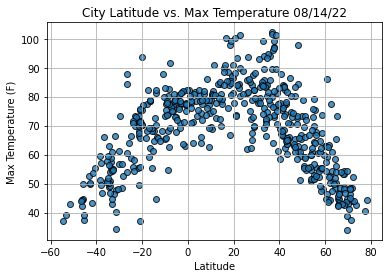

In [33]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

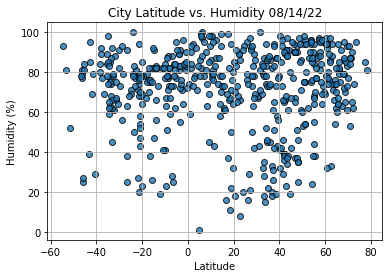

In [34]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

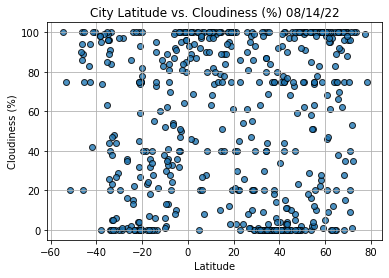

In [35]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

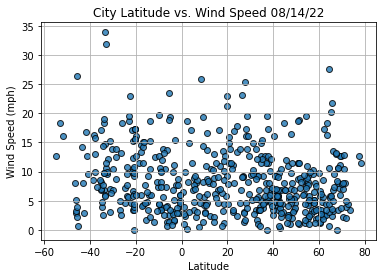

In [36]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [60]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
        # Import linregress
    from scipy.stats import linregress

    # Create a function to create perform linear regression on the weather data
    # and plot a regression line and the equation with the data.
    def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

        # Run regression on hemisphere weather data.
        (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

        # Calculate the regression line "y values" from the slope and intercept.
        regress_values = x_values * slope + intercept
        # Get the equation of the line.
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
        # Create a scatter plot and plot the regression line.
        plt.scatter(x_values,y_values)
        plt.plot(x_values,regress_values,"r")
        # Annotate the text for the line equation.
        plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
        plt.title(title)
        plt.xlabel('Latitude')
        plt.ylabel(y_label)
        plt.show()


In [51]:
index13 = city_data_df.loc[13]
index13

City                      Mayumba
Lat                        -3.432
Lng                       10.6554
Max Temp                    69.33
Humidity                       91
Cloudiness                     47
Wind Speed                   5.14
Country                        GA
Date          2022-08-14 21:36:58
Name: 13, dtype: object

In [52]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4       True
       ...  
521     True
522    False
523     True
524    False
525    False
Name: Lat, Length: 526, dtype: bool

In [53]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,La Rioja,42.2500,-2.5000,62.38,89,76,4.14,ES,2022-08-14 21:36:55
1,Hanzhong,33.0728,107.0303,76.05,87,100,1.70,CN,2022-08-14 21:36:55
2,Port Hardy,50.6996,-127.4199,62.78,94,75,11.50,CA,2022-08-14 21:36:55
4,Albany,42.6001,-73.9662,82.45,39,15,4.90,US,2022-08-14 21:33:53
6,San Quintin,30.4833,-115.9500,77.92,67,1,9.42,MX,2022-08-14 21:36:56


In [61]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,La Rioja,42.2500,-2.5000,62.38,89,76,4.14,ES,2022-08-14 21:36:55
1,Hanzhong,33.0728,107.0303,76.05,87,100,1.70,CN,2022-08-14 21:36:55
2,Port Hardy,50.6996,-127.4199,62.78,94,75,11.50,CA,2022-08-14 21:36:55
4,Albany,42.6001,-73.9662,82.45,39,15,4.90,US,2022-08-14 21:33:53
6,San Quintin,30.4833,-115.9500,77.92,67,1,9.42,MX,2022-08-14 21:36:56


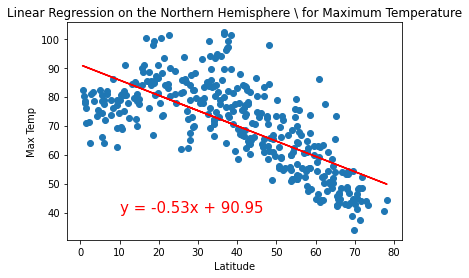

In [68]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]


# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \ for Maximum Temperature', 'Max Temp',(10,40))


plt.show()

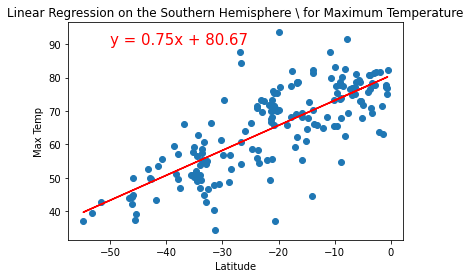

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \ for Maximum Temperature', 'Max Temp',(-50,90))


plt.show()

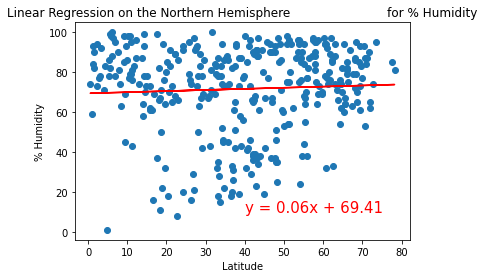

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

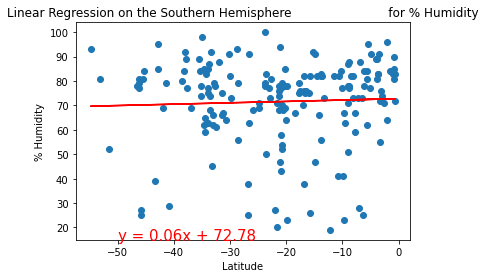

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

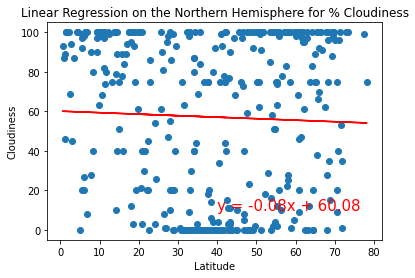

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', 'Cloudiness',(40,10))

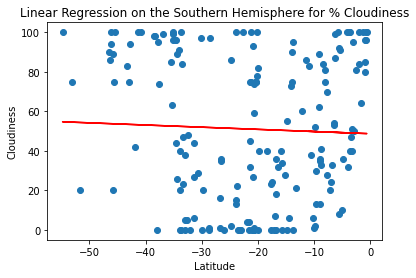

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', 'Cloudiness',(40,10))

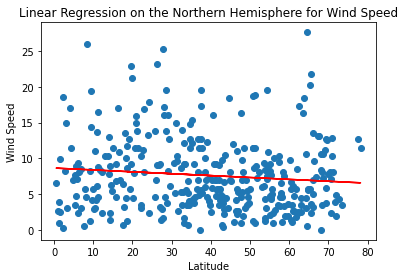

In [80]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

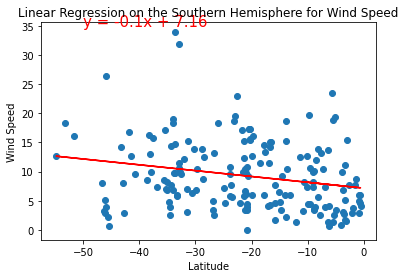

In [81]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))